In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [6]:
df=pd.read_csv(r'C:\Users\majal\Downloads\archive (8)\heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

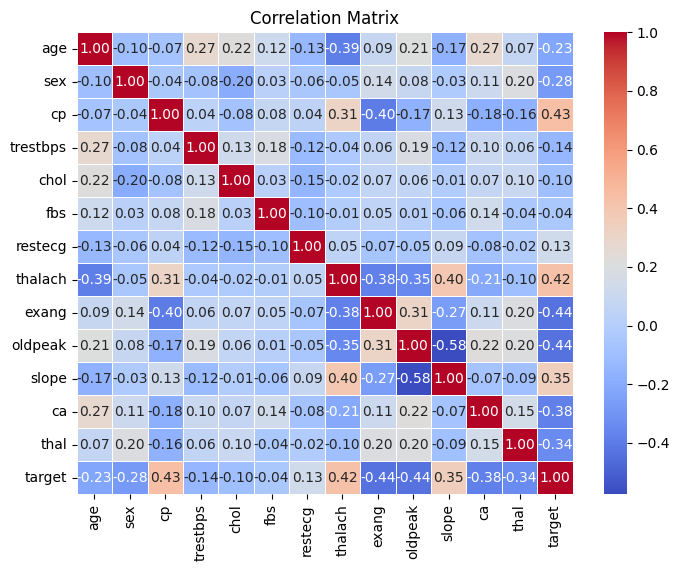

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

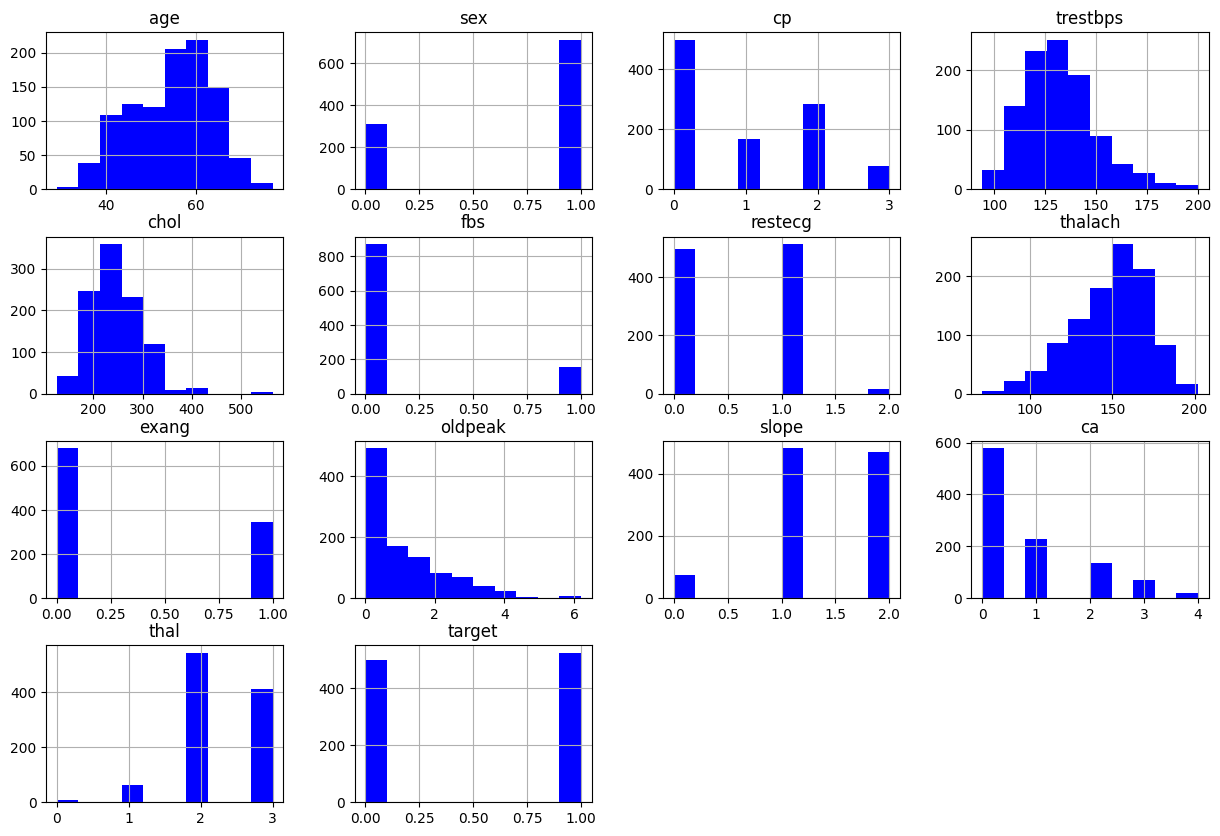

In [9]:
df.hist(bins=10,figsize=(15,10),color='blue')
plt.show()

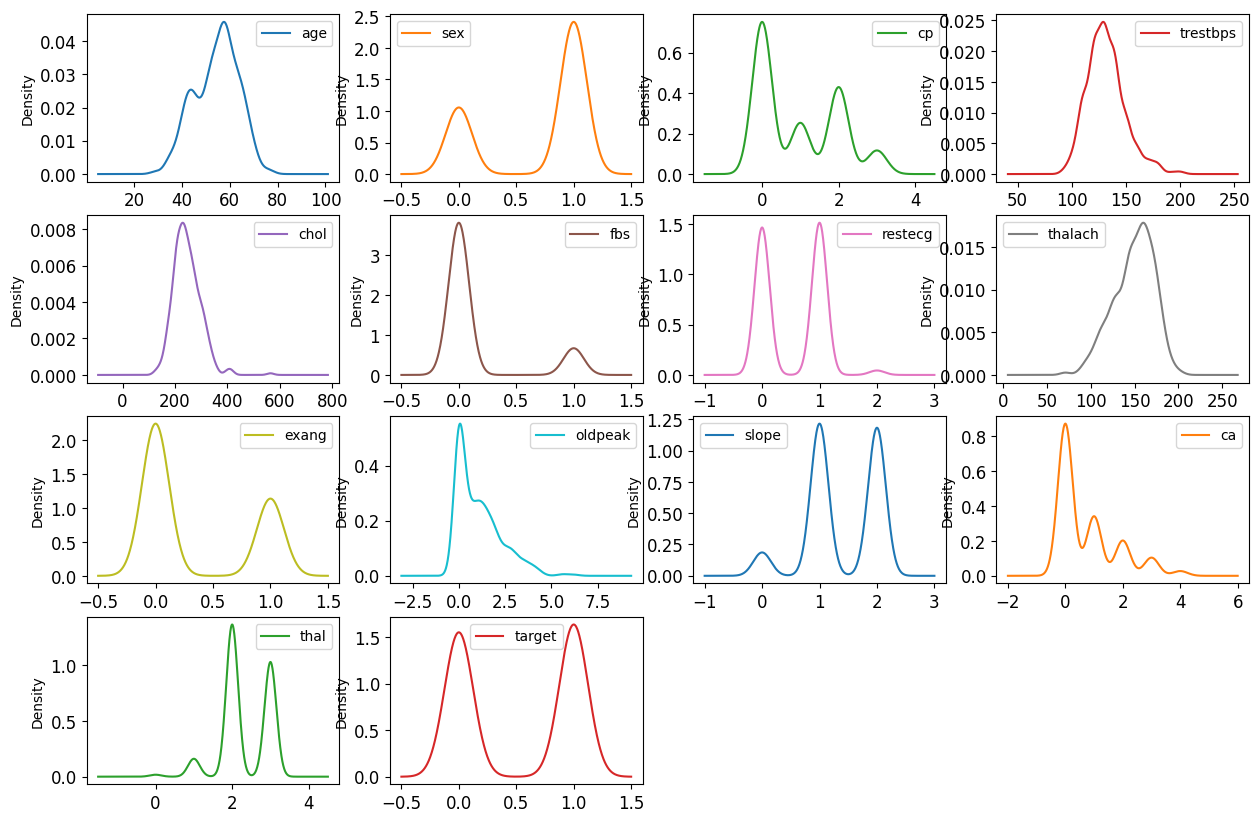

In [14]:
plt=df.plot(kind='density',subplots=True,layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

In [16]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [17]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [18]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [19]:
y=df['target']
X=df.drop(['target'], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
lr.score(X_test, y_test)

0.8181818181818182

In [24]:
pred = lr.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)
print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression Model Results:
Accuracy: 0.8181818181818182
Precision: 0.7888198757763976
Recall: 0.8523489932885906
F1 Score: 0.8193548387096774


<Axes: >

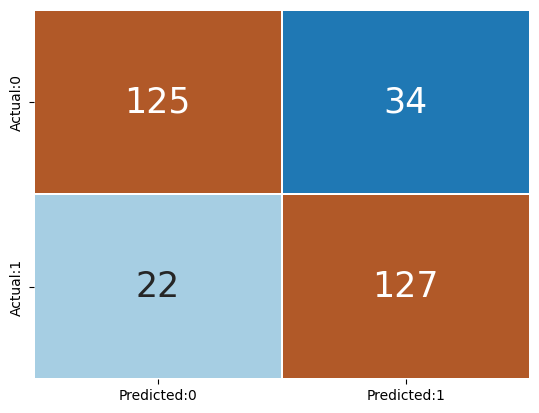

In [26]:
cm=confusion_matrix(y_test,pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})

Random forest

In [27]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
rfc.score(X_test,y_test)

0.9805194805194806

In [29]:
preducation=rfc.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test,preducation)
precision = precision_score(y_test,preducation)
recall = recall_score(y_test,preducation)
f1 = f1_score(y_test,preducation)
print("RandomForestClassifier Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

RandomForestClassifier Model Results:
Accuracy: 0.9805194805194806
Precision: 1.0
Recall: 0.959731543624161
F1 Score: 0.9794520547945206


In [ ]:
cm=confusion_matrix(y_test,preducation)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

SVC

In [32]:
sv=SVC(kernel='rbf', random_state = 10)
sv.fit(X_train,y_train)

SVC(random_state=10)

In [33]:
sv.score(X_test,y_test)

0.9025974025974026

In [34]:
preducation=sv.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test,preducation)
precision = precision_score(y_test,preducation)
recall = recall_score(y_test,preducation)
f1 = f1_score(y_test,preducation)
print("Support Vector Machine Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Support Vector Machine Model Results:
Accuracy: 0.9025974025974026
Precision: 0.8650306748466258
Recall: 0.9463087248322147
F1 Score: 0.9038461538461539


In [ ]:
cm=confusion_matrix(y_test,preducation)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [ ]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(preducation,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

Decision Tree Clasifier 

In [38]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
DT.score(X_test,y_test)

0.9707792207792207

In [40]:
preducation=DT.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test,preducation)
precision = precision_score(y_test,preducation)
recall = recall_score(y_test,preducation)
f1 = f1_score(y_test,preducation)
print("DecisionTreeClassifier Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

DecisionTreeClassifier Model Results:
Accuracy: 0.9707792207792207
Precision: 1.0
Recall: 0.9395973154362416
F1 Score: 0.9688581314878892


In [ ]:
cm=confusion_matrix(y_test,preducation)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [ ]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(preducation,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

KNN

In [44]:
knn=KNeighborsClassifier(n_neighbors= 2,weights ='uniform', algorithm='auto')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [45]:
knn.score(X_test,y_test)

0.9512987012987013

In [46]:
preducation=knn.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test,preducation)
precision = precision_score(y_test,preducation)
recall = recall_score(y_test,preducation)
f1 = f1_score(y_test,preducation)
print("KNN Model Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

KNN Model Results:
Accuracy: 0.9512987012987013
Precision: 1.0
Recall: 0.8993288590604027
F1 Score: 0.9469964664310954


In [ ]:
cm=confusion_matrix(y_test,preducation)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [ ]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(preducation,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.show()
plt.close()

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_names = ['LogisticRegression', 'SVM','Decision Tree', 'Random Forest','KNN']
accuracy_scores = [0.86, 0.912, 0.99,1.0,.967]
colors = [ 'paleturquoise', 'lightblue', 'skyblue','cyan','lightcyan']
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()